<h2>Intro to Text Analytics in Python</h2>

* Terminology
* Bag of Words Model
* TF-IDF Model
* Preprocessing and Hyperparameters
* Example
* N-gram model

<h3>Terminology</h3>

* Document - a single string of text information. This could be a single text message, email, tweet, lyrics to a song etc.

* Corpus - a collection of documents

* Token - a word, phrase or symbol derived from a document

* Tokenizer - function to split a document into a list of tokens

In [1]:
# Example corpus
messages = ["Hey hey hey lets go get lunch today :)",
           "Did you go home?",
           "Hey!!! I need a favor"]

In [2]:
# Example document
document = messages[0]
document

'Hey hey hey lets go get lunch today :)'

In [3]:
# Creating tokens
document.split(' ')

['Hey', 'hey', 'hey', 'lets', 'go', 'get', 'lunch', 'today', ':)']

<h3>Bag of Words Model</h3>

* need a numerical representation for our corpus
* will use CountVectorizer() from sci-kit learn library
* creates matrix of token counts

In [4]:
# import and instantiate CountVectorizer()
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

* next we will use fit() and transform() methods
* similar to fit() and predict() used in ML classifiers

In [5]:
vect.fit(messages)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [6]:
# before transforming look at feature names (columns names)
print vect.get_feature_names()
print 'Number of tokens: {}'.format(len(vect.get_feature_names()))

[u'did', u'favor', u'get', u'go', u'hey', u'home', u'lets', u'lunch', u'need', u'today', u'you']
Number of tokens: 11


Things to note:
* all lowercase
* words less than two letters are excluded
* punctuation removed
* no duplicates

Next, we'll use the transform() method to create a document term matrix(DTM). This is the matrix of token counts we want to create.

In [7]:
dtm = vect.transform(messages)
repr(dtm)

"<3x11 sparse matrix of type '<type 'numpy.int64'>'\n\twith 13 stored elements in Compressed Sparse Row format>"

In [8]:
print dtm

  (0, 2)	1
  (0, 3)	1
  (0, 4)	3
  (0, 6)	1
  (0, 7)	1
  (0, 9)	1
  (1, 0)	1
  (1, 3)	1
  (1, 5)	1
  (1, 10)	1
  (2, 1)	1
  (2, 4)	1
  (2, 8)	1


* Because each document has a column for every word that occurs in the corpus, DTM is predominatly filled with 0's
* Sparse format can store the DTM in a smaller amount of memory and can speed up operations
* a DTM of a large corpus can quickly balloon in size

In [9]:
import pandas as pd
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

,did,favor,get,go,hey,home,lets,lunch,need,today,you
0,0,0,1,1,3,0,1,1,0,1,0
1,1,0,0,1,0,1,0,0,0,0,1
2,0,1,0,0,1,0,0,0,1,0,0


What happens if we get a new message?

In [10]:
new_message = ['Hey lets go get a drink tonight']
new_dtm = vect.transform(new_message)
pd.DataFrame(new_dtm.toarray(), columns=vect.get_feature_names())

,did,favor,get,go,hey,home,lets,lunch,need,today,you
0,0,0,1,1,1,0,1,0,0,0,0


* only tokens from original fit appear as features(columns)
* need to refit with new message included

In [11]:
messages.append(new_message[0])
messages

['Hey hey hey lets go get lunch today :)',
 'Did you go home?',
 'Hey!!! I need a favor',
 'Hey lets go get a drink tonight']

In [12]:
dtm = vect.fit_transform(messages)
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

,did,drink,favor,get,go,hey,home,lets,lunch,need,today,tonight,you
0,0,0,0,1,1,3,0,1,1,0,1,0,0
1,1,0,0,0,1,0,1,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,1,0,0,0
3,0,1,0,1,1,1,0,1,0,0,0,1,0


<h3>TF-IDF Model</h3>

* term frequency inverse document frequency
* generally more popular than bag of words model
* numerical statistic to show how important an token is to a document
* TF-IDF = term frequency * (1 / document frequency)
* TF - how frequent a term(token) occurs in a document
* IDF - inverse of how frequent a term occurs across documents

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
def createDTM(messages):
    vect = TfidfVectorizer()
    dtm = vect.fit_transform(messages) # create DTM
    
    # create pandas dataframe of DTM
    return pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names()) 

In [14]:
messages = ["Hey lets get lunch :)",
           "Hey!!! I need a favor"]
createDTM(messages)

,favor,get,hey,lets,lunch,need
0,0.000000,0.534046,0.379978,0.534046,0.534046,0.000000
1,0.631667,0.000000,0.449436,0.000000,0.000000,0.631667


* `'hey'` has lowest value, only word that occurs in both documents
* `'favor'` and `'need'` have highest, occur in 1 document with fewest tokens

In [15]:
# add repeats of 'hey' to first message
messages = ["Hey hey hey lets get lunch :)",
           "Hey!!! I need a favor"]
createDTM(messages)

,favor,get,hey,lets,lunch,need
0,0.000000,0.363788,0.776515,0.363788,0.363788,0.000000
1,0.631667,0.000000,0.449436,0.000000,0.000000,0.631667


* TF for `'hey'` in first increases, but IDF for `'hey'` remains the same

In [16]:
# remove 'hey' from second message
messages = ["Hey hey hey lets get lunch :)",
           "I need a favor"]
createDTM(messages)

,favor,get,hey,lets,lunch,need
0,0.000000,0.288675,0.866025,0.288675,0.288675,0.000000
1,0.707107,0.000000,0.000000,0.000000,0.000000,0.707107


* `'hey'` for first message is now the highest value
* `'favor'` and `'need'` also increase as there are now fewer tokens in the second message

<h3>Preprocessing and Hyperparameters</h3>

* max_features = n : only considers the top n words when ordered by term frequency
* min_df = n : ignores words with a document frequency below n
* max_df = n : ignores words with a document frequency above n
* stop_words = [''] : ignores common words like `'the'`, `'that'`, `'which'` etc.

In [17]:
vect = CountVectorizer(stop_words='english')
print vect.get_stop_words()

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'four', 'not', 'own', 'through', 'yourselves', 'fify', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'go', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'neit

In [18]:
# defining our own stopwords
my_words = ['buffalo','data','science']
vect = CountVectorizer(stop_words=my_words)
print vect.get_stop_words()

frozenset(['data', 'buffalo', 'science'])


Word Stemming
* reduces a word down to its base/root form
* crude heuristic that works by chopping off end of word

In [19]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokens = ['manufactured','manufacturing','manufacture']

In [20]:
stems = [stemmer.stem(i) for i in tokens]
print stems

[u'manufactur', u'manufactur', u'manufactur']


Word Lemmatization
* similar to stemming
* seeks to find base dictionary form
* more complex, may need to specify part of speech for accurate results

In [21]:
from nltk import WordNetLemmatizer
lemmer = WordNetLemmatizer()
tokens = ['hands','women']

In [22]:
lemmas = [lemmer.lemmatize(i) for i in tokens]
print lemmas

[u'hand', u'woman']


In [23]:
lemmer.lemmatize('manufacturing')

'manufacturing'

In [24]:
# specify it as a verb, default is noun
lemmer.lemmatize('manufacturing','v')

u'manufacture'

<h2>Example</h2>

* dataset of song lyrics from 4 different artists (Beatles, Metallica, Eminem, Bob Dylan)
* we will use a vectorizer and then try to plot
* would expect similar songs to be close together

In [25]:
df = pd.read_csv('lyrics.txt', sep='\t')
df

,artist,song,lyrics
0,Beatles,Help!,(When) When I was younger (When I was young) s...
1,Beatles,Ticket to Ride,"I think I'm gonna be sad, I think it's today, ..."
2,Beatles,A Hard Days Night,"It's been a hard day's night, and I been worki..."
3,Beatles,Cant Buy Me Love,"Can't buy me love, love Can't buy me love I'll..."
4,Beatles,Eleanor Rigby,Ah look at all the lonely people Ah look at al...
5,Beatles,I Want to Hold Your Hand,"Oh yeah, I'll tell you something I think you'l..."
6,Beatles,She Loves You,"She loves you, yeah, yeah, yeah She loves you,..."
7,Beatles,Yesterday,Yesterday all my troubles seemed so far away. ...
8,Metallica,Nothing Else Matters,So close no matter how far Couldn't be much mo...
9,Metallica,Enter Sandman,"Say your prayers, little one Don't forget, my ..."


In [26]:
vect = TfidfVectorizer(stop_words='english',max_df=0.7)
dtm = vect.fit_transform(df['lyrics'])

In [27]:
repr(dtm)

"<32x1984 sparse matrix of type '<type 'numpy.float64'>'\n\twith 3471 stored elements in Compressed Sparse Row format>"

* we can't plot 1984 dimensions in an effective way
* need to reduce dimensionality to 2 dimensions 
* use Principle Component Analysis (PCA)
* describes data using smaller number of dimensions
* trys to retain variance and 'structure' of the data

In [33]:
# Principle Component Analysis (PCA) to reduce down to two dimensions
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(dtm.toarray())

In [34]:
df['A'] = X_pca[:,0]
df['B'] = X_pca[:,1]
df.head()

,artist,song,lyrics,A,B
0,Beatles,Help!,(When) When I was younger (When I was young) s...,-0.204841,0.018931
1,Beatles,Ticket to Ride,"I think I'm gonna be sad, I think it's today, ...",0.107004,-0.258968
2,Beatles,A Hard Days Night,"It's been a hard day's night, and I been worki...",0.044426,-0.247208
3,Beatles,Cant Buy Me Love,"Can't buy me love, love Can't buy me love I'll...",0.085107,-0.354033
4,Beatles,Eleanor Rigby,Ah look at all the lonely people Ah look at al...,-0.232241,0.069967


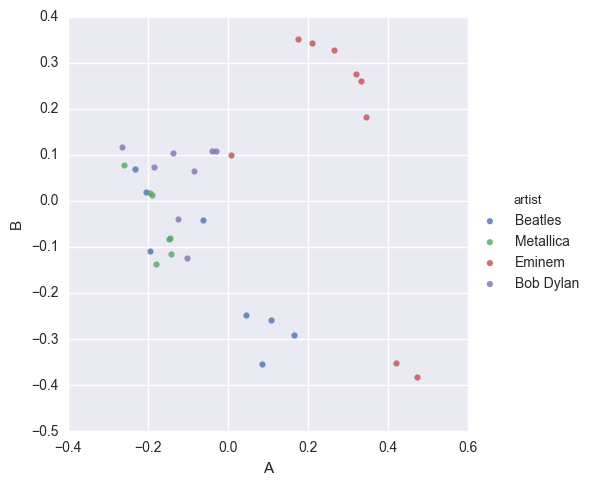

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='A', y='B', data=df,fit_reg=False, hue='artist')
plt.show()

If we had used CountVectorizer instead of TfidfVectorizer:
![title](countvect.png)

<h3>N-gram Model</h3>

* n-gram is a sequence of n words
* bag of words model is actually a specific case of the N-gram model where n=1
* Consider the string `'Buffalo Data Science Meetup'`
 * n=1 (unigram) :  `'Buffalo'`,`'Data'`,`'Science'`,`'Meetup'`  (Bag of words model)
 * n=2 (bigram) : `'Buffalo Data'`, `'Data Science'`, `'Science Meetup'`
 * n=3 (trigram) : `'Buffalo Data Science'`,`'Data Science Meetup`'
* using n-gram model info about order of tokens

In [36]:
messages = ["Hey hey hey lets go get lunch today :)",
           "Hey!!! I need a favor"]

In [37]:
# look at bigrams
vect = CountVectorizer(ngram_range=(2,2))
dtm = vect.fit_transform(messages)
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

,get lunch,go get,hey hey,hey lets,hey need,lets go,lunch today,need favor
0,1,1,2,1,0,1,1,0
1,0,0,0,0,1,0,0,1


In [38]:
# look at trigrams
vect = CountVectorizer(ngram_range=(3,3))
dtm = vect.fit_transform(messages)
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

,get lunch today,go get lunch,hey hey hey,hey hey lets,hey lets go,hey need favor,lets go get
0,1,1,1,1,1,0,1
1,0,0,0,0,0,1,0


In [39]:
# looking at unigrams, bigrams, and trigrams
vect = CountVectorizer(ngram_range=(1,3))
dtm = vect.fit_transform(messages)
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

,favor,get,get lunch,get lunch today,go,go get,go get lunch,hey,hey hey,hey hey hey,...,hey need,hey need favor,lets,lets go,lets go get,lunch,lunch today,need,need favor,today
0,0,1,1,1,1,1,1,3,2,1,...,0,0,1,1,1,1,1,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,1,0


In [40]:
# Can also use with tf-idf
vect = TfidfVectorizer(ngram_range=(2,2))
dtm = vect.fit_transform(messages)
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

,get lunch,go get,hey hey,hey lets,hey need,lets go,lunch today,need favor
0,0.333333,0.333333,0.666667,0.333333,0.000000,0.333333,0.333333,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.707107
